# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print('Beginning Data Retrieval')
print('-----------------------------')
# Get weather data

#Set up lists to hold reponse info

record_number = 1
set_number = 1
city_data = []
for i, city in enumerate(cities):
    if (i %50 == 0 and i >= 50 ):
        set_number +=1 
        record_number =0
    print(f'Processing Record {record_number} of Set {set_number} | {city}' )
    record_number +=1
    try:
        weather_response = requests.get(query_url + city).json()

        cloudiness = weather_response['clouds']['all']
        country = weather_response['sys']['country']
        date = weather_response['dt']
        humidity = weather_response['main']['humidity']
        lat = weather_response['coord']['lat']
        lng = weather_response['coord']['lon']
        max_tem = weather_response['main']['temp_max']
        wind_speed = weather_response['wind']['speed']
        city_data.append({ "City": city,
                           "Cloudiness": cloudiness,
                            "Country": country,
                            "Date": date,
                            "Humidity": humidity,
                            "Lat": lat,
                            "Lng":lng,
                            "Max Temp": max_tem,
                            "Wind Speed": wind_speed})
    except:
        print('city not found. Skipping city')
        pass
# Inform that Data Retrieval was Completed
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | baherden
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | bubaque
Processing Record 7 of Set 1 | aasiaat
Processing Record 8 of Set 1 | wageningen
Processing Record 9 of Set 1 | alvorada
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | kisangani
Processing Record 12 of Set 1 | cap-aux-meules
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | benjamin constant
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | santa marta
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | portland
Processing Record 22 of Set 1 | tumsar
Processing Record 23 of Set 1 | lavren

Processing Record 36 of Set 4 | zinder
Processing Record 37 of Set 4 | altay
Processing Record 38 of Set 4 | torbay
Processing Record 39 of Set 4 | chodavaram
Processing Record 40 of Set 4 | ostrovnoy
Processing Record 41 of Set 4 | itarema
Processing Record 42 of Set 4 | lanas
Processing Record 43 of Set 4 | conceicao do araguaia
Processing Record 44 of Set 4 | muros
Processing Record 45 of Set 4 | san francisco
Processing Record 46 of Set 4 | illoqqortoormiut
city not found. Skipping city
Processing Record 47 of Set 4 | singida
Processing Record 48 of Set 4 | myitkyina
Processing Record 49 of Set 4 | aquiraz
Processing Record 0 of Set 5 | awjilah
Processing Record 1 of Set 5 | namibe
Processing Record 2 of Set 5 | sao filipe
Processing Record 3 of Set 5 | santa maria
Processing Record 4 of Set 5 | basco
Processing Record 5 of Set 5 | libertador general san martin
Processing Record 6 of Set 5 | seoul
Processing Record 7 of Set 5 | lorengau
Processing Record 8 of Set 5 | kushiro
Proces

Processing Record 24 of Set 8 | pilar
Processing Record 25 of Set 8 | nantucket
Processing Record 26 of Set 8 | nanortalik
Processing Record 27 of Set 8 | bukama
Processing Record 28 of Set 8 | constitucion
Processing Record 29 of Set 8 | sorvag
city not found. Skipping city
Processing Record 30 of Set 8 | halalo
city not found. Skipping city
Processing Record 31 of Set 8 | vao
Processing Record 32 of Set 8 | pringsewu
Processing Record 33 of Set 8 | higuey
city not found. Skipping city
Processing Record 34 of Set 8 | cidreira
Processing Record 35 of Set 8 | vardo
Processing Record 36 of Set 8 | luderitz
Processing Record 37 of Set 8 | makakilo city
Processing Record 38 of Set 8 | tilichiki
Processing Record 39 of Set 8 | anuradhapura
Processing Record 40 of Set 8 | saint-ambroise
Processing Record 41 of Set 8 | kodinar
Processing Record 42 of Set 8 | molina
Processing Record 43 of Set 8 | codrington
Processing Record 44 of Set 8 | timra
Processing Record 45 of Set 8 | chulumani
Proces

Processing Record 12 of Set 12 | kathmandu
Processing Record 13 of Set 12 | vila franca do campo
Processing Record 14 of Set 12 | thinadhoo
Processing Record 15 of Set 12 | salinas
Processing Record 16 of Set 12 | launceston
Processing Record 17 of Set 12 | portobelo
Processing Record 18 of Set 12 | morondava
Processing Record 19 of Set 12 | valparaiso
Processing Record 20 of Set 12 | chester
Processing Record 21 of Set 12 | wanaka
Processing Record 22 of Set 12 | araouane
Processing Record 23 of Set 12 | visby
Processing Record 24 of Set 12 | campoverde
Processing Record 25 of Set 12 | havelock
Processing Record 26 of Set 12 | tateyama
Processing Record 27 of Set 12 | kampene
Processing Record 28 of Set 12 | mount gambier
Processing Record 29 of Set 12 | dabakala
Processing Record 30 of Set 12 | ruatoria
city not found. Skipping city
Processing Record 31 of Set 12 | olhao
Processing Record 32 of Set 12 | prince rupert
Processing Record 33 of Set 12 | mendeleyevsk
Processing Record 34 

In [4]:
# Create a data frame 
weather_df = pd.DataFrame(city_data)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df.to_csv("output/weather_cities.csv", encoding='utf-8', index=False)

In [6]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port alfred,100,ZA,1619666386,86,-33.5906,26.8910,67.37,15.77
1,punta arenas,75,CL,1619666177,87,-53.1500,-70.9167,39.20,16.11
2,baherden,100,TM,1619666387,56,38.4362,57.4316,72.28,5.37
3,kodiak,90,US,1619666253,87,57.7900,-152.4072,42.80,9.22
4,ushuaia,75,AR,1619666252,80,-54.8000,-68.3000,35.60,31.07


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
new_coders = "output/weather_cities.csv"

In [8]:
#Verify if there are any cities with humidity>100%
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,540.000000,5.400000e+02,540.000000,540.000000,540.000000,540.000000,540.000000
mean,54.346296,1.619666e+09,71.520370,17.629245,17.829709,61.835926,6.803296
std,37.845508,9.074003e+01,23.123319,34.166416,92.813077,19.015127,4.643604
min,0.000000,1.619666e+09,1.000000,-54.800000,-179.166700,16.770000,0.600000
25%,15.750000,1.619666e+09,59.000000,-10.494975,-60.862125,48.200000,3.440000
50%,62.500000,1.619666e+09,77.000000,20.608450,19.850750,63.920000,5.750000
75%,90.000000,1.619666e+09,89.000000,47.404975,100.817925,77.000000,9.167500
max,100.000000,1.619667e+09,100.000000,78.218600,178.416700,98.600000,31.070000


In [9]:
humidity_cities = weather_df.loc[weather_df["Humidity"] <= 100, :]
humidity_cities['City'].count()

540

In [10]:
#  Get the indices of cities that have humidity over 100%.

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

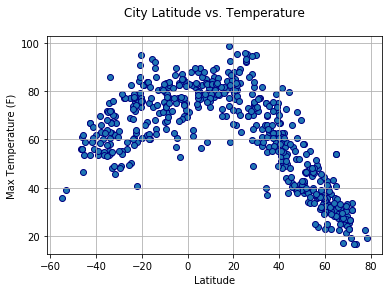

In [12]:
# Create a dataset:
df_temp=pd.DataFrame({'x_values': weather_df['Lat'], 'y_values': weather_df['Max Temp'] })
# plot
plt.scatter('x_values', 'y_values', data=df_temp, marker='o', edgecolors= 'navy')
plt.title("City Latitude vs. Temperature", pad = 20)
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig("Images/LatvsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

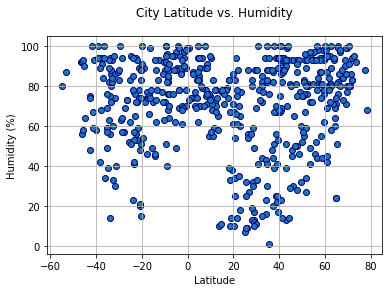

In [13]:
# Create a dataset:
df_hum=pd.DataFrame({'x_values': weather_df['Lat'], 'y_values': weather_df['Humidity'] })
# plot
plt.scatter( 'x_values', 'y_values', data=df_hum, marker='o', edgecolors= 'navy')
plt.title("City Latitude vs. Humidity", pad = 20)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
# Show plot
plt.savefig("Images/LatvsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

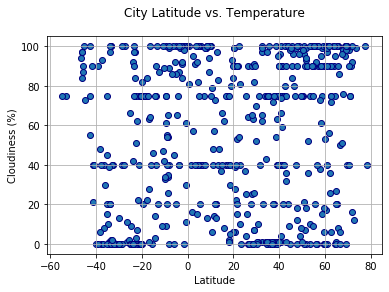

In [14]:
# Create a dataset:
df_cloud=pd.DataFrame({'x_values': weather_df['Lat'], 'y_values': weather_df['Cloudiness'] })
# plot
plt.scatter( 'x_values', 'y_values', data=df_cloud, marker='o', edgecolors= 'navy')
plt.title("City Latitude vs. Temperature", pad = 20)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
# Show plot
plt.savefig("Images/LatvsCloudiness.png")
plt.show()



## Latitude vs. Wind Speed Plot

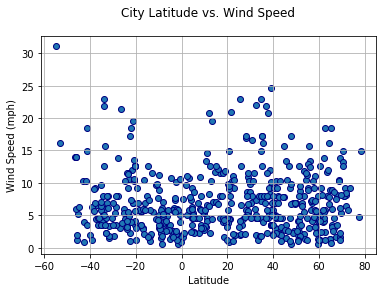

In [15]:
# Create a dataset:
df_wind=pd.DataFrame({'x_values': weather_df['Lat'], 'y_values': weather_df['Wind Speed'] })
# plot
plt.scatter('x_values', 'y_values', data=df_wind, marker='o', edgecolors= 'navy')
plt.title("City Latitude vs. Wind Speed", pad = 20)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
# Show plot
plt.savefig("Images/LatvsWindspeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

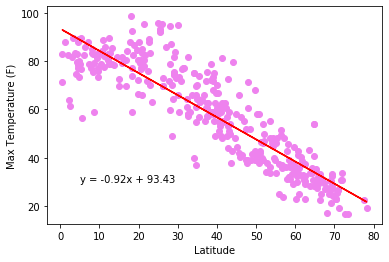

The r-value is: -0.8867246447375823


In [16]:
north_df=  weather_df.loc[weather_df['Lat'] >= 0]
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='violet')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (5,30))
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.savefig("Images/LinearLatvsTemp.png")
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

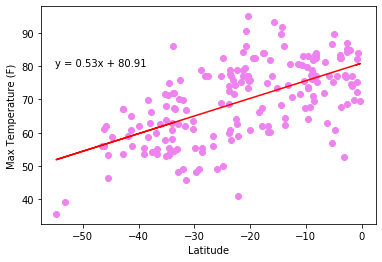

The r-value is: 0.6046298670787655


In [17]:
south_df=  weather_df.loc[weather_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='violet')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-55,80))
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.savefig("Images/LinearLatvsTemp_South.png")
plt.show()
print(f"The r-value is: {rvalue}")

#### Analysis : 
There is a strong linear relationship with the Temperature and Latitude in both Sothern and Northen Hemisphere.
Therefore, it can be inferred from both graphs that the closer a place is from the equator (latitude = 0) the warmer the place will be. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

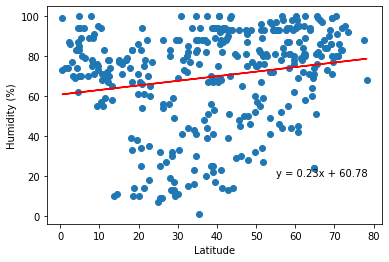

The r-value is: 0.18647050343759092


In [18]:
north_df=  weather_df.loc[weather_df['Lat'] >= 0]
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (55,20))
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.savefig("Images/LineraLatvsHumidity_North.png")
plt.show()
print(f"The r-value is: {rvalue}")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

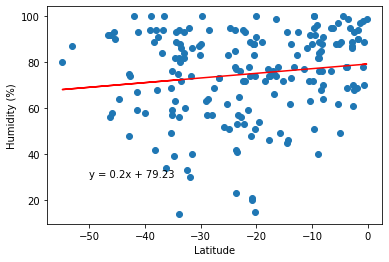

The r-value is: 0.14157858760004238


In [19]:
south_df=  weather_df.loc[weather_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,30))
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.savefig("Images/LineraLatvsHumidity_South.png")
plt.show()
print(f"The r-value is: {rvalue}")


#### Analysis : 
Because the r-values of the Humidity (%) vs. Latitude linear regression are between 0.1 and 0.2 it can be said that the linear relationship between the Humidity and the Latitude in the southern and northen hemisphere is a is a weak positive relationship. 


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

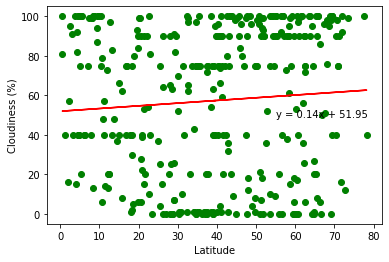

The r-value is: 0.07356239351915266


In [20]:
north_df=  weather_df.loc[weather_df['Lat'] >= 0]
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (55,49))
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.savefig("Images/LineraLatvsCloudiness_North.png")
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

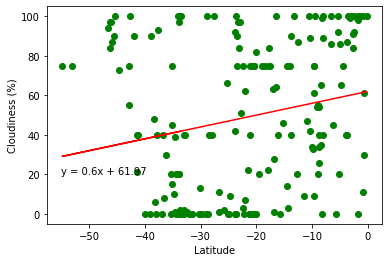

The r-value is: 0.20995679361164143


In [21]:
south_df=  weather_df.loc[weather_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color='g')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-55,20))
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.savefig("Images/LineraLatvsCloudiness_South.png")
plt.show()
print(f"The r-value is: {rvalue}")

#### Analysis :
Because the r-value is between 0 and 0.2 in both graphs, it can be said that the relationship between the Cloudiness percentage and the Latitude is very weak.  
Meaning that the correlation between the cloudiness percentage and the Latidude is negligible. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

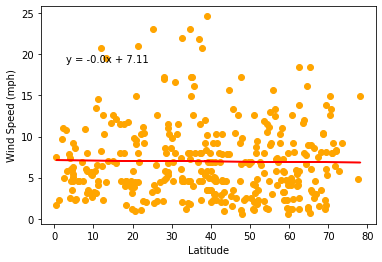

The r-value is: -0.0155250895410993


In [22]:
north_df=  weather_df.loc[weather_df['Lat'] >= 0]
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='orange')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (3,19))
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.savefig("Images/LineraLatvsWind_North.png")
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

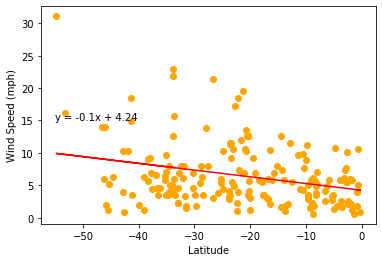

The r-value is: -0.29041708071088734


In [28]:
south_df=  weather_df.loc[weather_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='orange')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-55,15))
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.savefig("Images/LineraLatvsWind_South.png")
plt.show()
print(f"The r-value is: {rvalue}")

#### Analysis : 
Because the r-values for the Wind Speed (mph) vs. Latitude Linear Regression are between -0.015 and -0.29 it can be inferred that there is a weak negative linear relationship between the Latitude and the wind speed.

### BONUS

In [24]:
def regression( xvalues , yvalues, color, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xvalues,yvalues, color= color)
    plt.plot(xvalues,regress_values,"r-")
    plt.annotate(line_eq, (-55,15))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig("Images/LineraLatvsWind_South_Bonus.png")
    plt.show()
    

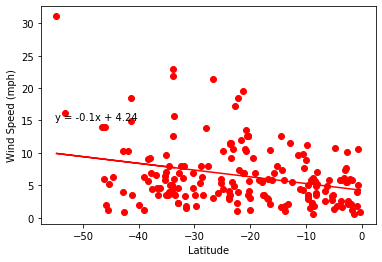

In [25]:
regression( south_df['Lat'],south_df['Wind Speed'], 'red',"Latitude", 'Wind Speed (mph)'  )

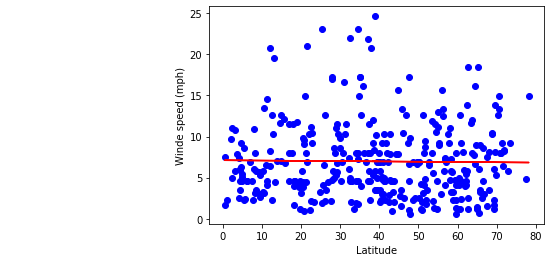

In [26]:
regression(north_df['Lat'], north_df['Wind Speed'], 'blue', "Latitude", 'Winde speed (mph)')